In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Health_insurance.xlsx')

In [3]:
data.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


### Feature Engineering Methods- 
1. Handling Missing Values- Imputation
2. Encoding- where, map, LabelEncoding
3. Feature Scaling - Normalization
4. Correlation- Correlation Matrix, Heatmap

### Exploratory Data Analysis


In [5]:
data.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [6]:
data['health_insurance_price'].describe()

count     1336.000000
mean     13268.527719
std      12112.797724
min       1121.873900
25%       4744.325050
50%       9382.033000
75%      16604.302645
max      63770.428010
Name: health_insurance_price, dtype: float64

In [7]:
data['health_insurance_price'].fillna(data['health_insurance_price'].median(), inplace= True)

In [8]:
data['age'].describe()

count    1310.000000
mean       39.166412
std        14.055378
min        18.000000
25%        26.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [9]:
data['age'].fillna(data['age'].median(), inplace= True)

In [10]:
data.columns

Index(['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location',
       'health_insurance_price'],
      dtype='object')

In [11]:
data['BMI'].describe()

count    1315.000000
mean       30.638217
std         6.110302
min        15.960000
25%        26.210000
50%        30.305000
75%        34.580000
max        53.130000
Name: BMI, dtype: float64

In [12]:
data['BMI'].fillna(data['BMI'].median(), inplace= True)

In [13]:
data.describe()

,age,BMI,Children,health_insurance_price
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.162930,30.632489,1.094918,13262.718310
std,13.907443,6.057672,1.205493,12104.666613
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4746.521225
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.430000,2.000000,16584.318157
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
correlation_matrix = data[['age','BMI', 'Children']].corr()
print(correlation_matrix)

               age       BMI  Children
age       1.000000  0.107637  0.041057
BMI       0.107637  1.000000  0.009742
Children  0.041057  0.009742  1.000000


<Axes: >

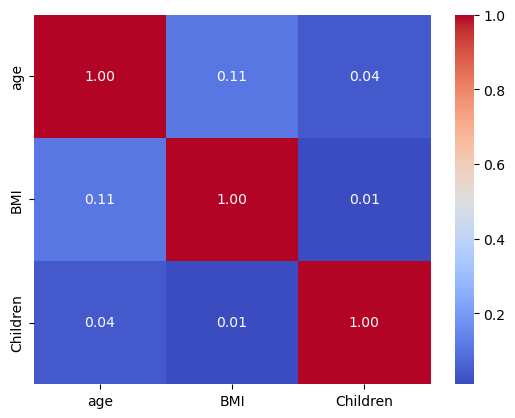

In [15]:
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt=".2f")

### Essential Pattern in EDA
- All the independent variables have no such correlation or no multicollinearity.

### Encoding

In [16]:
data['gender']= np.where(data['gender']== 'male', 1, 0)

In [17]:
data['smoking_status']= data['smoking_status'].map({'yes':1, 'no':0})

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['location']= le.fit_transform(data['location'])

In [19]:
data.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,30.305,0,1,3,16884.92400
1,18.0,1,33.770,1,0,2,1725.55230
2,28.0,1,33.000,3,0,2,4449.46200
3,33.0,1,22.705,0,0,1,21984.47061
4,32.0,1,28.880,0,0,1,3866.85520


### Feature Scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()
col_scale = ['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location']
data[col_scale] = scaler.fit_transform(data[col_scale])

In [22]:
data[col_scale]

,age,gender,BMI,Children,smoking_status,location
0,0.021739,0.0,0.385930,0.0,1.0,1.000000
1,0.000000,1.0,0.479150,0.2,0.0,0.666667
2,0.217391,1.0,0.458434,0.6,0.0,0.666667
3,0.326087,1.0,0.181464,0.0,0.0,0.333333
4,0.304348,1.0,0.347592,0.0,0.0,0.333333
...,...,...,...,...,...,...
1333,0.695652,1.0,0.403820,0.6,0.0,0.333333
1334,0.000000,0.0,0.429379,0.0,0.0,0.000000
1335,0.000000,0.0,0.562012,0.0,0.0,0.666667
1336,0.065217,0.0,0.264730,0.0,0.0,1.000000


### Variable Assigning

In [23]:
data.columns

Index(['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location',
       'health_insurance_price'],
      dtype='object')

In [24]:
X= data[['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location']]
y= data['health_insurance_price']

### Training and Testing

In [26]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=42)

### Methods Used for ML Model
- Linear Regression
- Random Forest
- Gradient Boosting

### Building Model and Build Model on Training data-

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

### Linear Regression

In [28]:
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred1=lr.predict(X_test)

### Random Forest Regressor

In [31]:
# Define the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [32]:
# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [33]:
# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [35]:
# Train the model with the best parameters
best_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred2 = best_rf.predict(X_test)

### Gradient Boosting Regressor

In [73]:
# Define the Gradient Boosting model
gboost = GradientBoostingRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [74]:
# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=gboost, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [75]:
# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [76]:
# Train the model with the best parameters
best_gboost = grid_search.best_estimator_

# Make predictions on the test set
y_pred3 = best_gboost.predict(X_test)

### Making Predictions

In [60]:
df= pd.DataFrame({'Actual':y_test, 'LR':y_pred1, 'RF':y_pred2, 'GB':y_pred3})
df

,Actual,LR,RF,GB
764,9095.06825,8921.349260,11012.556823,10270.657543
887,5272.17580,7141.095601,5297.573868,6422.903058
890,29330.98315,36715.174447,26929.813124,25725.417112
1293,9301.89355,9530.533866,10772.813316,10018.276217
259,33750.29180,32065.841074,40577.127705,39628.292101
...,...,...,...,...
109,47055.53210,38939.138796,48080.021736,44503.139793
575,12222.89830,11767.216805,12833.741396,12379.397096
535,6067.12675,7682.204023,6583.074261,7304.350531
543,63770.42801,40756.653242,47416.354440,45379.083453


<Axes: >

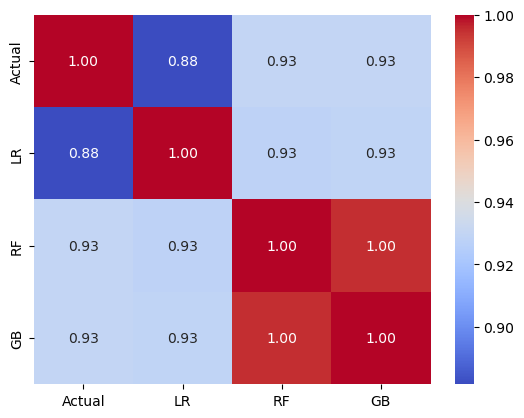

In [61]:
cm=df.corr()
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt=".2f")

### Model Comparison-

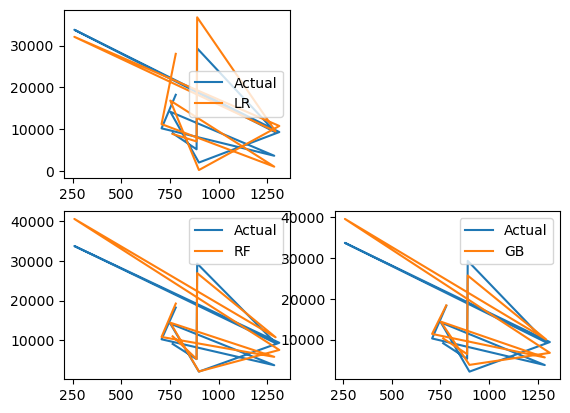

In [62]:
plt.subplot(221)
plt.plot(df['Actual'].iloc[0:11], label='Actual')
plt.plot(df['LR'].iloc[0:11], label='LR')
plt.legend()

plt.subplot(223)
plt.plot(df['Actual'].iloc[0:11], label='Actual')
plt.plot(df['RF'].iloc[0:11], label='RF')
plt.legend()

plt.subplot(224)
plt.plot(df['Actual'].iloc[0:11], label='Actual')
plt.plot(df['GB'].iloc[0:11], label='GB')
plt.legend()

### Model Evaluation
- R2 Score
- Adjusted R2 Score
- Mean Squared Error

In [64]:
from sklearn.metrics import r2_score, mean_squared_error

In [65]:
r2_1 = r2_score(y_test, y_pred1)
r2_2 = r2_score(y_test, y_pred2)
r2_3 = r2_score(y_test, y_pred3)
print(r2_1,r2_2,r2_3)

0.7762723519584975 0.8641440616996975 0.8613034715175748


In [78]:
adjusted_r2_1 = 1 - (1 - r2_1) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
adjusted_r2_2 = 1 - (1 - r2_2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
adjusted_r2_3 = 1 - (1 - r2_3) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print(adjusted_r2_1,adjusted_r2_2,adjusted_r2_3)

0.7711291876357044 0.8610209366812998 0.85811504557545


In [79]:
mse1 = mean_squared_error(y_test,y_pred1)
mse2 = mean_squared_error(y_test,y_pred2)
mse3 = mean_squared_error(y_test,y_pred3)
print(mse1,mse2,mse3)

34684742.91911977 21061895.278618712 21502275.093397897


### Selected Model- Random Forest
- After training and testing 3 different models(Linear Regression, Random Forest and Gradient Boosting), the performance of  Random Forest is more close to the actual values.
- Evaluation metrics also suggest that gboost is more accurate than other models.

### Model Run-  to predict new prediction

In [80]:
data = {'age':44, 'gender':1, 'BMI': 34.15, 'Children':1, 'smoking_status':1, 'location':2}
df1 = pd.DataFrame(data, index=[0])
df1

,age,gender,BMI,Children,smoking_status,location
0,44,1,34.15,1,1,2


In [81]:
new_pred = best_gboost.predict(df1)
print(f'New customer predicted insurance cost : {new_pred}')

New customer predicted insurance cost : [45379.08345347]
